In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf

### 더미 변수

In [3]:
# 여러개의 범주형 자료 => 가변수 설정
df=pd.DataFrame({'m_id':[1,2,3,4,5],
            'm_gen':['rock','rock','pop','disco','pop']},
            columns=['m_id','m_gen'])

In [4]:
df

,m_id,m_gen
0,1,rock
1,2,rock
2,3,pop
3,4,disco
4,5,pop


In [5]:
mm=pd.get_dummies(df['m_id'])
mm

,1,2,3,4,5
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1


In [9]:
mm=pd.get_dummies(df['m_gen'])
mm

,disco,pop,rock
0,0,0,1
1,0,0,1
2,0,1,0
3,1,0,0
4,0,1,0


In [7]:
mm=df.join(mm.add_prefix('genre_'))
mm

,m_id,m_gen,genre_1,genre_2,genre_3,genre_4,genre_5
0,1,rock,1,0,0,0,0
1,2,rock,0,1,0,0,0
2,3,pop,0,0,1,0,0
3,4,disco,0,0,0,1,0
4,5,pop,0,0,0,0,1


### MNIST 분류

In [30]:
import random
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [27]:
mnist=input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [15]:
# 5만개 train 이미지(입력, 레이블) => 모델
# 1만개 test 이미지 => 모델 => 출력결과 정확도?

In [16]:
nb_classes=10 #분류결과의 종류 개수

In [22]:
x = tf.placeholder(tf.float32, shape=[None,28*28])
y = tf.placeholder(tf.float32, [None,nb_classes])
w = tf.Variable(tf.random_normal([28*28,nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))
hf = tf.nn.softmax(tf.matmul(x,w)+b)
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(hf), axis=1))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
is_correct = tf.equal(tf.arg_max(hf,1), tf.arg_max(y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))
#에폭(전체 데이터를 1번 트레이닝 -> 1에폭)
training_epochs=15
batch_size=100 # 한번에 이미지 100개씩 읽어서 모델을 만들겠다는 의미 
# 5만개 이미지를 15번 트레이닝하겠다는 의미 
# 5만개 이미지는 10개(0~9개 이미지)로 분류되므로 이미지 1개 5000개씩 있음

W0805 10:49:45.967214 14404 deprecation.py:323] From <ipython-input-22-5f585224a1ed>:8: arg_max (from tensorflow.python.ops.gen_math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.math.argmax` instead


Epoch:    1 cost: 2.530654409
Epoch:    2 cost: 1.070437187
Epoch:    3 cost: 0.856291815
Epoch:    4 cost: 0.751059485
Epoch:    5 cost: 0.684664240
Epoch:    6 cost: 0.637401114
Epoch:    7 cost: 0.601829903
Epoch:    8 cost: 0.573228710
Epoch:    9 cost: 0.549600203
Epoch:   10 cost: 0.529506460
Epoch:   11 cost: 0.512433297
Epoch:   12 cost: 0.497759866
Epoch:   13 cost: 0.484976103
Epoch:   14 cost: 0.473409090
Epoch:   15 cost: 0.462843170
learning finished
accuarcy: 0.8915
Label: [5]
Prediction: [5]


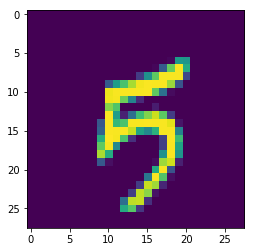

In [34]:
# 원래 session객체를 쓰면 닫아줘야하는데 with 구문으로 쓰면 닫을 필요 없음
# with 구문을 벗어나면 session 객체가 해제됨
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs): # 5만개 이미지 * 15번 트레이닝
        avg_cost=0
        total_batch=int(mnist.train.num_examples / batch_size) # 5만/100
        for i in range(total_batch): # 500번(1번에 100개씩 이미지를 읽겠다) => for문이 한번 다 돌면 에폭 1
            batch_xs, batch_ys=mnist.train.next_batch(batch_size) #이미지 100개씩 읽어오기 
            # batch_xs=[100,784], batch_ys=[100,10]
            cv,_=sess.run([cost,train], feed_dict={x:batch_xs,y:batch_ys}) # cv는 100개의 데이터에 대한 cost
            avg_cost+=cv/total_batch #100개 데이터 cost/500
        print("Epoch:","%4d" % (epoch+1),
             'cost:','{:.9f}'.format(avg_cost))
    print("learning finished")
    print("accuarcy:" ,sess.run(accuracy, feed_dict={x:mnist.test.images,y:mnist.test.labels}))
# 1,3,7,10,14 => 35/5=7
# 0.2, 0.6, 1.4,2,2.8 => 합은 7
    r=random.randint(0, mnist.test.num_examples-1) 
    # 0부터 텍스트 이미지 데이터 개수-1 사이의 값 중 랜덤으로 정수 난수 생성 => 테스트를 하고자하는 이미지 
    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
    print("Prediction:", sess.run(tf.argmax(hf,1), feed_dict={x:mnist.test.images[r:r+1]}))
    
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28))
    plt.show()

### tensorflow XOR 구현

In [35]:
xdata=[[0,0],[0,1],[1,0],[1,1]]
ydata=[[0],[1],[1],[0]]

In [43]:
# logistic regression
x=tf.placeholder(tf.float32,[None,2])
y=tf.placeholder(tf.float32,[None,1])
w=tf.Variable(tf.random_normal([2,1]))
b=tf.Variable(tf.random_normal([1]))
hf=tf.sigmoid(tf.matmul(x,w)+b) # hf값을 0 또는 1로 출력되도록 sigmoid 취하기 
cost=-tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)
predicted=tf.cast(hf>0.5, dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,y), dtype=tf.float32))

In [47]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={x:xdata,y:ydata})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={x:xdata,y:ydata}),
                 sess.run(w))
    hv,pv,av=sess.run([hf, predicted, accuracy],feed_dict={x:xdata,y:ydata})
    print("hf:",hv,"pre:",pv,"acc:",av)
    print("bias:",sess.run(b))

0 1.0719781 [[-0.4729615]
 [-0.6273164]]
100 0.6938585 [[0.10852448]
 [0.02083156]]
200 0.69336855 [[0.07610168]
 [0.02924813]]
300 0.69324225 [[0.04822697]
 [0.02319653]]
400 0.6931888 [[0.03079358]
 [0.01742185]]
500 0.6931657 [[0.01984385]
 [0.01270047]]
600 0.6931554 [[0.01289124]
 [0.00907516]]
700 0.69315094 [[0.0084326 ]
 [0.00639399]]
800 0.69314885 [[0.00554824]
 [0.00445918]]
900 0.6931479 [[0.00366821]
 [0.00308644]]
1000 0.69314754 [[0.00243499]
 [0.00212416]]
1100 0.69314736 [[0.00162166]
 [0.00145561]]
1200 0.6931472 [[0.00108285]
 [0.00099415]]
1300 0.69314724 [[0.00072464]
 [0.00067726]]
1400 0.6931472 [[0.00048582]
 [0.00046052]]
1500 0.69314724 [[0.00032612]
 [0.0003126 ]]
1600 0.6931472 [[0.00021916]
 [0.00021194]]
1700 0.6931472 [[0.0001474 ]
 [0.00014354]]
1800 0.6931472 [[9.9208381e-05]
 [9.7151365e-05]]
1900 0.6931472 [[6.6807304e-05]
 [6.5709915e-05]]
2000 0.6931472 [[4.5008393e-05]
 [4.4423603e-05]]
2100 0.6931472 [[3.0335219e-05]
 [3.0018649e-05]]
2200 0.69314

In [48]:
xdata=[[0,0],[0,1],[1,0],[1,1]]
ydata=[[0],[1],[1],[0]]

In [61]:
x=tf.placeholder(tf.float32,[None,2])
y=tf.placeholder(tf.float32,[None,1])

w1=tf.Variable(tf.random_normal([2,2]))
b1=tf.Variable(tf.random_normal([2]))
L1=tf.sigmoid(tf.matmul(x,w1)+b1) # [None,2]

w2=tf.Variable(tf.random_normal([2,1]))
b2=tf.Variable(tf.random_normal([1]))
hf=tf.sigmoid(tf.matmul(L1,w2)+b2)

cost=-tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)
predicted=tf.cast(hf>0.5, dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,y), dtype=tf.float32))

In [66]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={x:xdata,y:ydata})
        if step % 100 == 0:
            print(step, "\ncost:",sess.run(cost, feed_dict={x:xdata,y:ydata}),
                 "\nw1:",sess.run(w1),"\nw2:",sess.run(w2))
    hv,pv,av=sess.run([hf, predicted, accuracy],feed_dict={x:xdata,y:ydata})
    print("\nhf:",hv,"\npre:",pv,"\nacc:",av)
    print("\nbias:",sess.run(b1), sess.run(b2))

0 
cost: 0.8091888 
w1: [[-0.7444174   0.09767172]
 [ 0.3188605  -0.989869  ]] 
w2: [[0.02539168]
 [0.06557688]]
100 
cost: 0.69318676 
w1: [[-0.72878975  0.12739241]
 [ 0.33056808 -0.98616   ]] 
w2: [[0.38630638]
 [0.22766113]]
200 
cost: 0.6928748 
w1: [[-0.7298085  0.1568503]
 [ 0.3238133 -0.9891866]] 
w2: [[0.39248028]
 [0.2500529 ]]
300 
cost: 0.6927068 
w1: [[-0.7323847   0.18818425]
 [ 0.3169577  -0.9936031 ]] 
w2: [[0.38605845]
 [0.27007255]]
400 
cost: 0.6925104 
w1: [[-0.73538375  0.22201319]
 [ 0.3112231  -0.99929404]] 
w2: [[0.37973982]
 [0.2930884 ]]
500 
cost: 0.6922768 
w1: [[-0.7387797   0.25871128]
 [ 0.30659986 -1.0065426 ]] 
w2: [[0.37396574]
 [0.3195396 ]]
600 
cost: 0.6919947 
w1: [[-0.74259794  0.29865843]
 [ 0.30304968 -1.0157162 ]] 
w2: [[0.36877635]
 [0.34972274]]
700 
cost: 0.69165105 
w1: [[-0.7468783   0.34224826]
 [ 0.30054712 -1.0272706 ]] 
w2: [[0.36422268]
 [0.38396147]]
800 
cost: 0.69122905 
w1: [[-0.75167656  0.3898845 ]
 [ 0.29908273 -1.0417612 ]] 
w

7700 
cost: 0.023947135 
w1: [[-5.691221   5.873626 ]
 [ 5.375578  -6.0465274]] 
w2: [[8.810754]
 [8.765437]]
7800 
cost: 0.023387231 
w1: [[-5.709185   5.888072 ]
 [ 5.394007  -6.0615873]] 
w2: [[8.855411]
 [8.808938]]
7900 
cost: 0.022852123 
w1: [[-5.7266855  5.9021664]
 [ 5.411957  -6.0762877]] 
w2: [[8.899082]
 [8.851526]]
8000 
cost: 0.022340167 
w1: [[-5.743743   5.915924 ]
 [ 5.4294477 -6.0906415]] 
w2: [[8.941811]
 [8.893242]]
8100 
cost: 0.021849867 
w1: [[-5.760379   5.9293613]
 [ 5.4465017 -6.1046634]] 
w2: [[8.983635]
 [8.934116]]
8200 
cost: 0.021380018 
w1: [[-5.776611   5.942489 ]
 [ 5.463139  -6.1183686]] 
w2: [[9.024592]
 [8.97418 ]]
8300 
cost: 0.020929327 
w1: [[-5.7924566  5.9553223]
 [ 5.4793777 -6.1317697]] 
w2: [[9.064718]
 [9.013469]]
8400 
cost: 0.020496655 
w1: [[-5.8079324  5.967873 ]
 [ 5.495234  -6.144879 ]] 
w2: [[9.104042]
 [9.052009]]
8500 
cost: 0.02008098 
w1: [[-5.8230553  5.9801517]
 [ 5.5107245 -6.1577077]] 
w2: [[9.142599]
 [9.089826]]
8600 
cost:

In [67]:
x=tf.placeholder(tf.float32,[None,2])
y=tf.placeholder(tf.float32,[None,1])

w1=tf.Variable(tf.random_normal([2,10]))
b1=tf.Variable(tf.random_normal([10]))
L1=tf.sigmoid(tf.matmul(x,w1)+b1) # [None,2]

w2=tf.Variable(tf.random_normal([10,1]))
b2=tf.Variable(tf.random_normal([1]))
hf=tf.sigmoid(tf.matmul(L1,w2)+b2)

cost=-tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)
predicted=tf.cast(hf>0.5, dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,y), dtype=tf.float32))

In [73]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={x:xdata,y:ydata})
        if step % 100 == 0:
            print(step, "cost:",sess.run(cost, feed_dict={x:xdata,y:ydata}))
    hv,pv,av=sess.run([hf, predicted, accuracy],feed_dict={x:xdata,y:ydata})
    print("\nhf:",hv,"\npre:",pv,"\nacc:",av)
#     print("\nbias:",sess.run(b1), sess.run(b2))
## 층은 얇지만 층을 구성하는 노드를 넓게했더니 정확도가 많이 올라감

0 cost: 0.9844317
100 cost: 0.6437523
200 cost: 0.6031059
300 cost: 0.55670464
400 cost: 0.5064163
500 cost: 0.4545452
600 cost: 0.40254325
700 cost: 0.3521511
800 cost: 0.30520827
900 cost: 0.26309937
1000 cost: 0.22648169
1100 cost: 0.19534582
1200 cost: 0.1692406
1300 cost: 0.14750783
1400 cost: 0.12944749
1500 cost: 0.114411235
1600 cost: 0.10183892
1700 cost: 0.09126656
1800 cost: 0.08231797
1900 cost: 0.07469198
2000 cost: 0.06814814
2100 cost: 0.062494986
2200 cost: 0.05757954
2300 cost: 0.05327902
2400 cost: 0.049494453
2500 cost: 0.04614561
2600 cost: 0.043166913
2700 cost: 0.04050474
2800 cost: 0.03811447
2900 cost: 0.035959393
3000 cost: 0.03400854
3100 cost: 0.032236025
3200 cost: 0.030619906
3300 cost: 0.029141542
3400 cost: 0.027785063
3500 cost: 0.026536813
3600 cost: 0.025385069
3700 cost: 0.024319584
3800 cost: 0.023331493
3900 cost: 0.022413142
4000 cost: 0.021557715
4100 cost: 0.020759325
4200 cost: 0.020012699
4300 cost: 0.019313158
4400 cost: 0.018656658
4500 cost:

In [75]:
# deep & wide 신경망 설계
x=tf.placeholder(tf.float32,[None,2])
y=tf.placeholder(tf.float32,[None,1])

w1=tf.Variable(tf.random_normal([2,10]))
b1=tf.Variable(tf.random_normal([10]))
L1=tf.sigmoid(tf.matmul(x,w1)+b1) # [None,2]

w2=tf.Variable(tf.random_normal([10,10]))
b2=tf.Variable(tf.random_normal([10]))
L2=tf.sigmoid(tf.matmul(L1,w2)+b2)

w3=tf.Variable(tf.random_normal([10,10]))
b3=tf.Variable(tf.random_normal([10]))
L3=tf.sigmoid(tf.matmul(L2,w3)+b3)

w4=tf.Variable(tf.random_normal([10,1]))
b4=tf.Variable(tf.random_normal([1]))
hf=tf.sigmoid(tf.matmul(L3,w4)+b4)

cost=-tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)
predicted=tf.cast(hf>0.5, dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,y), dtype=tf.float32))

In [76]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={x:xdata,y:ydata})
        if step % 100 == 0:
            print(step, "cost:",sess.run(cost, feed_dict={x:xdata,y:ydata}))
    hv,pv,av=sess.run([hf, predicted, accuracy],feed_dict={x:xdata,y:ydata})
    print("\nhf:",hv,"\npre:",pv,"\nacc:",av)

0 cost: 0.7030981
100 cost: 0.6778734
200 cost: 0.6549016
300 cost: 0.62988794
400 cost: 0.5960167
500 cost: 0.54513264
600 cost: 0.46884105
700 cost: 0.36467153
800 cost: 0.25124228
900 cost: 0.16128802
1000 cost: 0.10487891
1100 cost: 0.072026104
1200 cost: 0.052435793
1300 cost: 0.04010418
1400 cost: 0.031897858
1500 cost: 0.026163904
1600 cost: 0.021990336
1700 cost: 0.018847926
1800 cost: 0.016414322
1900 cost: 0.014484687
2000 cost: 0.012923902
2100 cost: 0.011639786
2200 cost: 0.010567628
2300 cost: 0.009661113
2400 cost: 0.008886004
2500 cost: 0.008216734
2600 cost: 0.0076338057
2700 cost: 0.007122104
2800 cost: 0.0066697574
2900 cost: 0.006267417
3000 cost: 0.0059074513
3100 cost: 0.0055837603
3200 cost: 0.0052912896
3300 cost: 0.005025849
3400 cost: 0.0047840024
3500 cost: 0.0045628576
3600 cost: 0.004359917
3700 cost: 0.0041730436
3800 cost: 0.0040005837
3900 cost: 0.0038408686
4000 cost: 0.0036926363
4100 cost: 0.0035546701
4200 cost: 0.003426053
4300 cost: 0.003305811
4400

In [80]:
# deep & wide 설계
x=tf.placeholder(tf.float32,[None,2])
y=tf.placeholder(tf.float32,[None,1])

w1=tf.Variable(tf.random_normal([2,10]))
b1=tf.Variable(tf.random_normal([10]))
L1=tf.sigmoid(tf.matmul(x,w1)+b1) # [None,2]

w2=tf.Variable(tf.random_normal([10,10]))
b2=tf.Variable(tf.random_normal([10]))
L2=tf.sigmoid(tf.matmul(L1,w2)+b2)

w3=tf.Variable(tf.random_normal([10,10]))
b3=tf.Variable(tf.random_normal([10]))
L3=tf.sigmoid(tf.matmul(L2,w3)+b3)

w4=tf.Variable(tf.random_normal([10,10]))
b4=tf.Variable(tf.random_normal([10]))
L4=tf.sigmoid(tf.matmul(L3,w4)+b4)

w5=tf.Variable(tf.random_normal([10,10]))
b5=tf.Variable(tf.random_normal([10]))
L5=tf.sigmoid(tf.matmul(L4,w5)+b5)

w6=tf.Variable(tf.random_normal([10,10]))
b6=tf.Variable(tf.random_normal([10]))
L6=tf.sigmoid(tf.matmul(L5,w6)+b6)

w7=tf.Variable(tf.random_normal([10,10]))
b7=tf.Variable(tf.random_normal([10]))
L7=tf.sigmoid(tf.matmul(L6,w7)+b7)

w8=tf.Variable(tf.random_normal([10,10]))
b8=tf.Variable(tf.random_normal([10]))
L8=tf.sigmoid(tf.matmul(L7,w8)+b8)

w9=tf.Variable(tf.random_normal([10,10]))
b9=tf.Variable(tf.random_normal([10]))
L9=tf.sigmoid(tf.matmul(L8,w9)+b9)

w10=tf.Variable(tf.random_normal([10,1]))
b10=tf.Variable(tf.random_normal([1]))
hf=tf.sigmoid(tf.matmul(L9,w10)+b10)

cost=-tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)
predicted=tf.cast(hf>0.5, dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,y), dtype=tf.float32))

In [81]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={x:xdata,y:ydata})
        if step % 100 == 0:
            print(step, "cost:",sess.run(cost, feed_dict={x:xdata,y:ydata}))
    hv,pv,av=sess.run([hf, predicted, accuracy],feed_dict={x:xdata,y:ydata})
    print("\nhf:",hv,"\npre:",pv,"\nacc:",av)

0 cost: 0.9495955
100 cost: 0.6931598
200 cost: 0.6931596
300 cost: 0.69315946
400 cost: 0.6931594
500 cost: 0.6931593
600 cost: 0.69315904
700 cost: 0.6931589
800 cost: 0.6931587
900 cost: 0.69315875
1000 cost: 0.6931585
1100 cost: 0.6931584
1200 cost: 0.69315827
1300 cost: 0.69315815
1400 cost: 0.69315803
1500 cost: 0.6931579
1600 cost: 0.6931578
1700 cost: 0.6931576
1800 cost: 0.69315743
1900 cost: 0.6931573
2000 cost: 0.69315714
2100 cost: 0.6931571
2200 cost: 0.69315696
2300 cost: 0.69315684
2400 cost: 0.6931568
2500 cost: 0.6931565
2600 cost: 0.69315636
2700 cost: 0.69315624
2800 cost: 0.69315624
2900 cost: 0.69315606
3000 cost: 0.69315594
3100 cost: 0.6931559
3200 cost: 0.6931557
3300 cost: 0.6931556
3400 cost: 0.6931554
3500 cost: 0.69315535
3600 cost: 0.69315517
3700 cost: 0.6931552
3800 cost: 0.69315505
3900 cost: 0.69315493
4000 cost: 0.69315475
4100 cost: 0.6931547
4200 cost: 0.69315445
4300 cost: 0.69315445
4400 cost: 0.6931543
4500 cost: 0.6931542
4600 cost: 0.693154
4700

In [ ]:
# mnist -> deep & wide 설계 => 정확도 90% 이상